## Eucleadian Distance calculation for new point - CH.SC.U4CSE23240

Enter brightness : 55
Enter Saturation : 60
New point         : [55, 60]
Closest neighbors : [(11.180339887498949, [50, 50], 'Blue'), (18.027756377319946, [70, 70], 'Blue'), (30.4138126514911, [60, 90], 'Blue')]
Neighbor classes  : ['Blue', 'Blue', 'Blue']
Predicted class   : Blue 




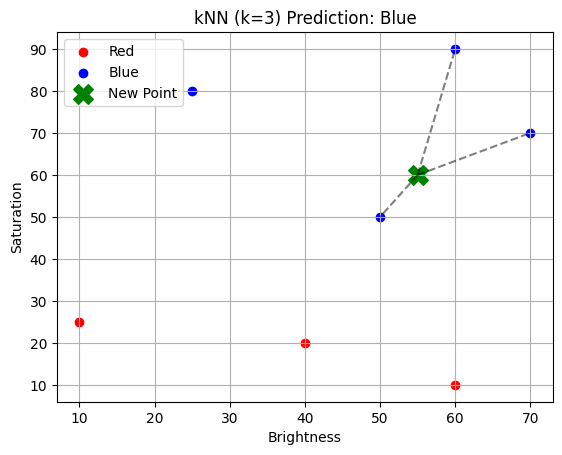

'Blue'

In [7]:
import math
from collections import Counter
import matplotlib.pyplot as plt

data = [
    [40, 20, "Red"],
    [50, 50, "Blue"],
    [60, 90, "Blue"],
    [10, 25, "Red"],
    [70, 70, "Blue"],
    [60, 10, "Red"],
    [25, 80, "Blue"]
]

def euclidean_distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def knn_predict(new_point, k=3):
    distances = []
    for row in data:
        dist = euclidean_distance(new_point, row[:2])
        distances.append((dist, row[:2], row[2]))

    distances.sort(key=lambda x: x[0])
    neighbors = distances[:k]
    classes = [cls for _, _, cls in neighbors]
    prediction = Counter(classes).most_common(1)[0][0]

    print(f"New point         : {new_point}")
    print("Closest neighbors :", neighbors)
    print("Neighbor classes  :", classes)
    print("Predicted class   :", prediction, "\n\n")

    for x, y, cls in data:
        color = "red" if cls == "Red" else "blue"
        plt.scatter(x, y, color=color, label=cls if cls not in plt.gca().get_legend_handles_labels()[1] else "")

    plt.scatter(new_point[0], new_point[1], color="green", marker="X", s=200, label="New Point")

    for _, coords, cls in neighbors:
        plt.plot([new_point[0], coords[0]], [new_point[1], coords[1]], "k--", alpha=0.5)

    plt.xlabel("Brightness")
    plt.ylabel("Saturation")
    plt.title(f"kNN (k={k}) Prediction: {prediction}")
    plt.legend()
    plt.grid(True)
    plt.show()
    return prediction

br = int(input("Enter brightness : "))
sat = int(input("Enter Saturation : "))
knn_predict([br, sat], k=3)
